In [1]:
import numpy as np

In [1]:
!pip list

Package                       Version   Location
----------------------------- --------- -----------------------------------------
alabaster                     0.7.12
appnope                       0.1.2
argon2-cffi                   20.1.0
astroid                       2.5.1
async-generator               1.10
attrs                         20.3.0
Babel                         2.9.0
backcall                      0.2.0
bleach                        3.3.0
certifi                       2020.12.5
cffi                          1.14.5
chardet                       4.0.0
cplex                         20.1.0.1
cryptography                  3.4.6
cycler                        0.10.0
Cython                        0.29.21
ddt                           1.4.1
decorator                     4.4.2
defusedxml                    0.6.0
dill                          0.3.3
dlx                           1.0.4
docplex                       2.20.204
docutils                      0.16
dulwich                   

In [34]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
from qiskit_optimization.algorithms.goemans_williamson_optimizer \
    import (GoemansWilliamsonOptimizer, GoemansWilliamsonOptimizationResult)
from qiskit_optimization.applications.max_cut import Maxcut
from qiskit_optimization.algorithms import CplexOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
maxcut.graph.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1.0}), (0, 2, {'weight': 1.0}), (1, 2, {'weight': 1.0}), (2, 3, {'weight': 1.0})])

In [36]:
graph = np.array([[0., 1., 2., 0.],
                    [1., 0., 1., 0.],
                    [2., 1., 0., 1.],
                    [0., 0., 1., 0.]])

In [48]:
optimizer = GoemansWilliamsonOptimizer(num_cuts=10, seed=0)

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'GoemansWilliamsonOptimizer'. You can install it with 'pip install 'qiskit-optimization[cvxpy]''."

In [38]:
maxcut = Maxcut(graph)
pos = nx.spring_layout(maxcut.graph, seed=111)

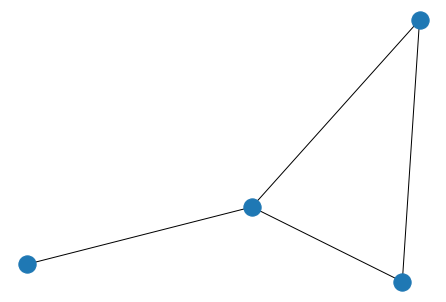

In [39]:
nx.draw(maxcut.graph, pos=pos)

In [26]:
graph = np.array([[0., 1., 1., 0.],
                    [1., 0., 1., 0.],
                    [1., 1., 0., 1.],
                    [0., 0., 1., 0.]])

In [42]:
maxcut = Maxcut(graph)
pos = nx.spring_layout(maxcut.graph, seed=111)
qp = maxcut.to_quadratic_program()
qp

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 3 x_0 + 2 x_1 + 4 x_2 + x_3 + [ - 4 x_0*x_1 - 8 x_0*x_2 - 4 x_1*x_2
      - 4 x_2*x_3 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End

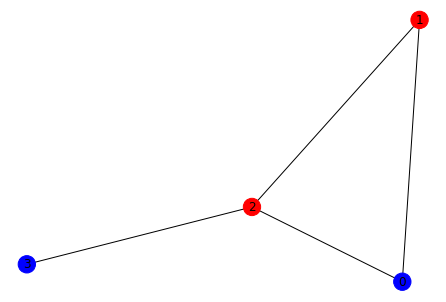

In [43]:
nx.draw(maxcut.graph, node_color=maxcut._node_color(result), pos=pos, with_labels=True)

In [44]:
optimizer = CplexOptimizer()
result = optimizer.solve(qp)
result

optimal function value: 4.0
optimal value: [0. 0. 1. 0.]
status: SUCCESS

In [45]:
maxcut.interpret(result)

[[0, 1, 3], [2]]

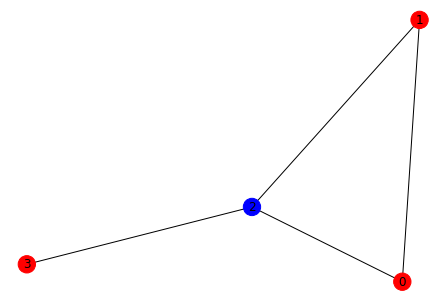

In [46]:
nx.draw(maxcut.graph, node_color=maxcut._node_color(result), pos=pos, with_labels=True)

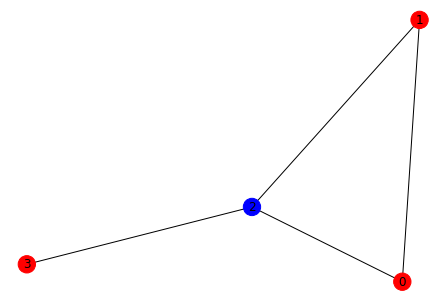

In [47]:
maxcut.draw(result, pos)

In [15]:
maxcut._node_color(result)

['b', 'r', 'r', 'b']